# Answer to Question 1 :
Reading the csv file using pandas and storing it in a dataframe

In [26]:
import pandas as pd
data = pd.read_csv("C:\\Users\\VISHAL\\Documents\\Case Studies_10K\\Datasets-20200307T133324Z-001\\Datasets\\arthritis.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [2]:
# Checking the shape of the data (dimensions)
data.shape

# 906 rows and 7 columns

(906, 7)

In [3]:
data.head()

,id,y,sex,age,trt,baseline,time
1,1,4.0,2,54,2,2,1
2,1,5.0,2,54,2,2,3
3,1,5.0,2,54,2,2,5
4,2,4.0,1,41,1,3,1
5,2,4.0,1,41,1,3,3


# Answer to Question 2 :


The key objective of the case study is to Evaluate the effectiveness of the drug auranofin versus the placebo therapy for the treatment of rheumatoid arthritis. 
The response variable : y using the predictor variables given in the dataset like sex, age, trt , baseline & time

The data collected in the given excel file is grouped under which data class "Longitudinal or Panel Data"


# Answer to Question 3 :

In [4]:
print(data["y"])

1      4.0
2      5.0
3      5.0
4      4.0
5      4.0
      ... 
902    2.0
903    2.0
904    2.0
905    3.0
906    3.0
Name: y, Length: 906, dtype: float64


Comments/Observations :
The response variable has numbers ranging from 1 to 5 (it's a ordinal variable on a 1 to 5 measured scale)

# Answer to Question 4 :

Plotting a Scatterplot matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDAF4009C8>,
      dtype=object)

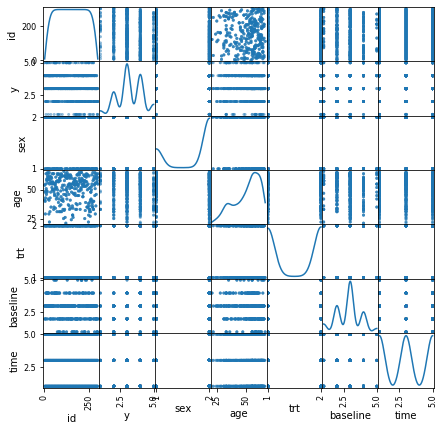

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(data,figsize=(7,7), diagonal='kde')

# Answer to Question 5 :

In [34]:
data.describe()

,id,y,sex,age,baseline,time
count,906.000000,888.000000,906.000000,906.000000,906.000000,906.000000
mean,151.500000,3.227477,1.725166,50.377483,2.864238,3.000000
std,87.227565,0.963862,0.446677,11.103377,0.927363,1.633895
min,1.000000,1.000000,1.000000,21.000000,1.000000,1.000000
25%,76.000000,3.000000,1.000000,42.000000,2.000000,1.000000
50%,151.500000,3.000000,2.000000,54.000000,3.000000,3.000000
75%,227.000000,4.000000,2.000000,60.000000,3.000000,5.000000
max,302.000000,5.000000,2.000000,66.000000,5.000000,5.000000


In [ ]:
# Observations :
# The mean age is 50 years with maximum being 66 of the 302 patients
# The average self assessment score given has been 3.227 out of the max 5

In [33]:
data['trt'] = data.trt.astype('category')
data.dtypes
# Another method to do the same as above 

id             int64
y            float64
sex            int64
age            int64
trt         category
baseline       int64
time           int64
dtype: object

# Answer to Question 6 :

Plotting a histogram for the variable 'Trt'

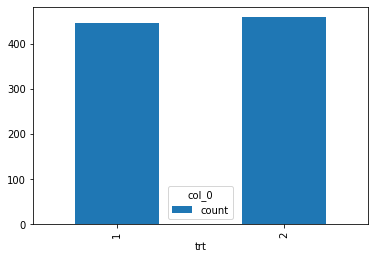

In [7]:
my_tab = pd.crosstab(index = data["trt"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

In [8]:
my_tab = pd.crosstab(index=data["trt"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0,count
trt,
1,447
2,459


Observations :
We observe Treatment group 2 (Drug Group) has higher count of rows compared to treatment group 1 (Placebo group) in the dataset

# Answer to Question 7 :

Creating frequency tables(crosstabs) for the variable 'Age'

In [9]:
data['age'].value_counts().head(1)
# Clearly seen, Age 55 has 66 observations which has the maximum count against all other age groups

55    66
Name: age, dtype: int64

# Answer to Question 8:

Box Plot : Age vs Trt

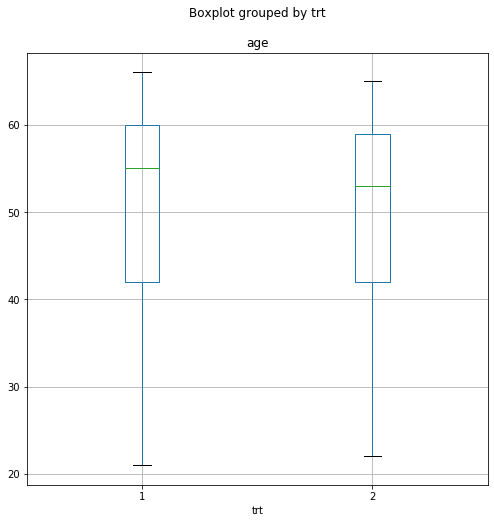

In [12]:
data.boxplot(column="age",        # Column to plot
                 by= "trt",         # Column to split upon
                 figsize= (8,8))        # Figure size

Observation:
It can be seen that the distribution of articles for both the treatment groups are quite similar wrt. age of patients,
Also : Median age is higher for Trt 1 than Trt 2 group
Skewness is towards the left, clearly seen from the plot above

# Answer to Question 9:
Create a two-way frequency table for trt vs sex variables ?

In [13]:
# Table of treatment group vs. sex
trt_sex = pd.crosstab(index=data["trt"], 
                           columns=data["sex"])

trt_sex.index= ["1 : Treatment Group","2 : Drug Group"]

trt_sex

sex,1,2
1 : Treatment Group,129,318
2 : Drug Group,120,339


# Answer to Question 10:
Plot the above created table in a bar chart ?

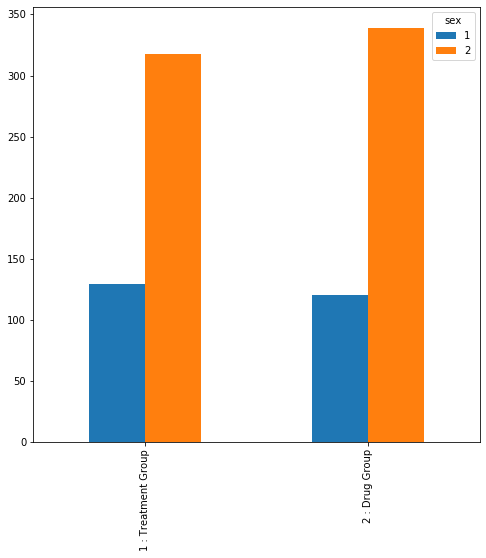

In [14]:
trt_sex.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

# Answer to Question 11:
Plot the age vs baseline variables on a box plot and comment on the observations  ?

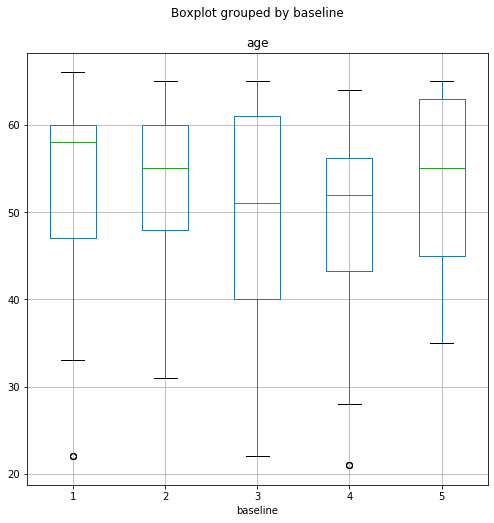

In [15]:
data.boxplot(column="age",        # Column to plot
                 by= "baseline",         # Column to split upon
                 figsize= (8,8))        # Figure size

Observations:
1) Potential Outliers for baseline 1 and 4 in the lower age group compared to others
2) Also : Median age is the highest for Baseline 1 followed by 2,4,5 and 3
3) Skewness is towards the left, clearly seen from the plot above

# Answer to Question 12 :

The response of interest is often a categorical variable, whether binary, nominal, or ordinal
Here : the response variable 'y' is ordinal.

Often the categorical responses will be correlated in clusters, e.g., in "repeated measure" studies.

The observations within a cluster will often be positively correlated, i.e., the observations will tend to be more like each other than like observations from other clusters. 
This correlation must be taken into account when analyzing clustered studies for proper inference and valid hypothesis testing

Generalized estimating equations (GEE) or Generalized Linear Mixed (GLMM) modeling approach is useful for analyzing such correlated data with categorical or continuous responses


# Answer to Question 13:

I.I.D stands for : Independent and identically distributed
Assumption : Measured values of dependent variables or predictor variables are independent from each other.

Values repeatedly measured in the same individual are usually more similar to each other than values from different individuals : therefore not independent and hence this is a violation. 

GEE method with a cumulative logit marginal model is proposed to solve here
We use a technique that focuses on specifying the mean response of the outcome : (a marginal approach or population average approach) to estimate regression parameters that is valid in the presence of correlated measurements

GEE models and  Mixed effects model decompose variance to some extent and make them I.I.D
Both GEE and GLMM are used when the assumption of independence is violated


# Answer to Question 14 :

GEE is the extension of generalized linear models (GLM) to longitudinal data. 
Logistic regression with correlated errors : GEE
The GEE method was developed by Liang and Zeger (1986) in order to produce regression estimates when analyzing repeated measures with non-normal response variables.
The goal is to make inferences about the population when accounting for the within-subject correlation
For every one-unit increase in a covariate across the population, GEE tells us how much the average response would change

Assumptions of GEE :
i) Measurements are independent across clusters
ii) Measurements may be correlated within cluster

The package to be used to implement GEE in Python is :
import statsmodels.api as sm
import statsmodels.formula.api as smf (smf.gee)

# Answer to Question 15 :

The package to be used to implement GEE in Python is :
import statsmodels.api as sm
import statsmodels.formula.api as smf (smf.gee)

# Answer to Question 16:

GEE estimates are the same as "Ordinary Least Squares (OLS)" if the dependent variable is normally distributed and no correlation within responses are assumed

# Answer to Question 17:

GLMM vs GEE models

GLMM : Generalized Linear Mixed Models  (Mixed effects models)
GEE  : Generalized Estimating equations (Marginal models )

Both use different approach to account for non independence of repeated measurements
While marginal models focus on the mean outcome, mixed effect models provide a fully specified mode for multivariate distribution of the repeatedly measured outcome


# Answer to Question 18:

If the response variable y were not repeated and Multi class ordinal level data,
Proportional odds ordinal logistic regression model is the best model to be chosen
Implemented in Python using "mord"

# Answer to Question 19:

we fit a GEE model in which the working dependence structure specifies no dependence within subjects.

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,
    Independence,Autoregressive)
from statsmodels.genmod.families import Poisson
fam = Poisson()
ind = Independence()
model1 = GEE.from_formula("y ~ time + trt + baseline", "trt", data, cov_struct=ind, family=fam)
result1 = model1.fit()
print(result1.summary())
print(ind.summary())

                               GEE Regression Results                              
Dep. Variable:                           y   No. Observations:                  888
Model:                                 GEE   No. clusters:                        2
Method:                        Generalized   Min. cluster size:                 443
                      Estimating Equations   Max. cluster size:                 445
Family:                            Poisson   Mean cluster size:               444.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Tue, 10 Mar 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         18:43:58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6334      0.082      7.739      0.000       0.473       0.794
time   

As seen by the scale : it's clearly not a case of over dispersion
Tried with independence above , now with exchangeable

We also observe in the below summary that : There is no correlation within the cluster

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

fam = sm.families.Poisson()

ind = sm.cov_struct.Exchangeable()

mod = smf.gee("y~time+trt+baseline", "id",data, family=fam,)
res = mod.fit()
print(res.summary())
print(ind.summary())

                               GEE Regression Results                              
Dep. Variable:                           y   No. Observations:                  888
Model:                                 GEE   No. clusters:                      301
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                   3
Family:                            Poisson   Mean cluster size:                 3.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Tue, 10 Mar 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         18:44:06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6334      0.062     10.200      0.000       0.512       0.755
time   

In [29]:
# This is implemented by OrdinalGEE since the response is a ordinal variable importing packages :
# statsmodels.api & statsmodels.formula.api in the class :
# statsmodels.genmod.generalized_estimating_equations.OrdinalGEE

#Applying ordinal GEE here :

import statsmodels.formula.api as smf
model = smf.ordinal_gee("y ~time + trt + baseline ", "id", data,
                                cov_struct=ind)
result = model.fit()
print(result.summary())

# The effects of the 5 months follow-up indicator, of the drug auranofin (Treatment group 2), 
# and of the indicators of the baseline response level 3 or higher (3,4,5) are statistically significant

# Conclusion :
# The drug auranofin (treatment group 2) improved the self-assessment during the trial, 
# as subjects in the treatment group have estimated cumulative odds : 1.67 times those of subjects in the placebo group. 

                           OrdinalGEE Regression Results                           
Dep. Variable:                           y   No. Observations:                 3552
Model:                          OrdinalGEE   No. clusters:                      296
Method:                        Generalized   Min. cluster size:                  12
                      Estimating Equations   Max. cluster size:                  12
Family:                           Binomial   Mean cluster size:                12.0
Dependence structure:         Exchangeable   Num. iterations:                    14
Date:                     Tue, 10 Mar 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         18:45:48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
I(y>1.0)       2.2627   3.63e+07   6.23e-08      1.000   -7.11e+07    7.11e+07
I(y>2.0

# Answer to Question: 20 

Linear Mixed Effects models are used for regression analyses involving dependent data. Such data arise when working with longitudinal and other study designs in which multiple observations are made on each subject. Some specific linear mixed effects models are

Random intercepts models, where all responses in a group are additively shifted by a value that is specific to the group.

Random slopes models, where the responses in a group follow a (conditional) mean trajectory that is linear in the observed covariates, with the slopes (and possibly intercepts) varying by group.

Variance components models, where the levels of one or more categorical covariates are associated with draws from distributions. These random terms additively determine the conditional mean of each observation based on its covariate values.

import statsmodels.api as sm

import statsmodels.formula.api as smf

"mixedlm" is used for GLMM methods in Python